### **K-means**

Implement [k-means algorithm](https://en.wikipedia.org/wiki/K-means_clustering)

 - load the s3.txt file
 - choose 15 random points wihin your data
 - compute the distance from those points to each point of the data
 - assign the points to the closest centroids
 - update the centroids as the center (mean) of all the coordinates
 - repeat the last 3 steps 100 times
 - plot the clusters and the final centroids

![](pictures / clusters.png)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import colormaps
import seaborn as sns

In [30]:
gf = colormaps['tab20']

(0.19215686274509805, 0.5098039215686274, 0.7411764705882353)

In [17]:
class kmeans():
    def __init__(self,filename, k=15,iters=100):
        self.k=k
        self.iters=iters
        self.filename=filename
        self.data=np.genfromtxt(filename)
        labels = np.zeros(len(self.data[:,0]))
        self.data=np.column_stack((self.data,labels))
        self.data=pd.DataFrame(self.data)
        self.data.columns=["x","y","label"]

        x_min = self.data["x"].min()
        y_min = self.data["y"].min()
        x_max = self.data["x"].max()
        y_max = self.data["y"].max()

        self.centroids = np.column_stack((np.random.uniform(x_min,x_max, k),np.random.uniform(y_min,y_max, k)))
        self.distances=np.zeros((len(self.data["x"]),k))

    def update_distances(self):
        for i in range(self.k):
            self.distances[:,i]=(self.data["x"]-self.centroids[i,0])**2+(self.data["y"]-self.centroids[i,1])**2
    
    def assign_clusters(self):
        self.update_distances()
        self.data["label"]=self.distances.argmin(axis=1)

    def update_centroids(self):
        self.centroids=np.array(self.data.groupby("label").mean())

    def display(self,filename):
        sns.relplot(data=self.data, x='x', y='y', hue='label',palette='tab20', aspect=1.61,s=10)
        # plt.scatter(self.data["x"],self.data["y"], color=colors[self.data['label']], s=1)
        plt.scatter(self.centroids[:,0],self.centroids[:,1], color='black',s=5)
    
    def run(self):
        for i in range (self.iters):
            self.assign_clusters()
            self.update_centroids()
        self.display(self.filename)
    

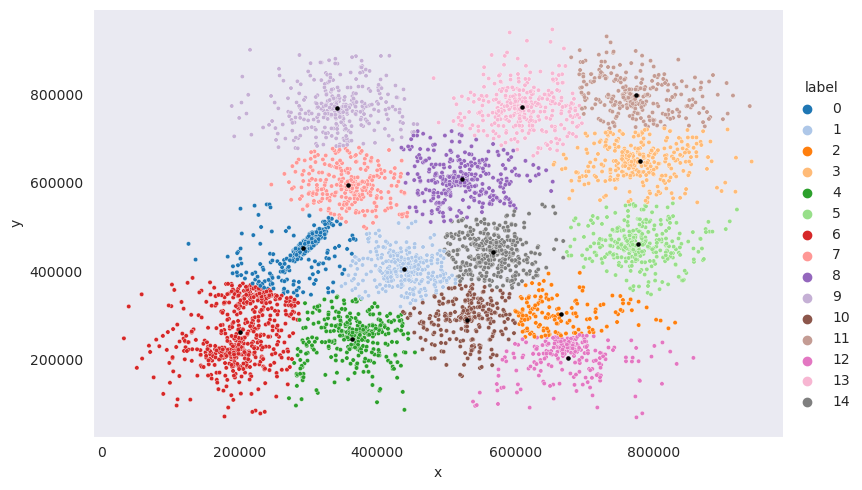

In [20]:
sns.set_style("dark")

km=kmeans('data/s3.txt')
km.run()